# Chapter 2: Computing and Displaying Data

## Spherical astronomy

### Declination of the Sun

In [1]:
import math

N = 171 # day of 1st solstice
omega = 2*math.pi/365.24 # angular velocity in rad/day
ecl = math.radians(23.44) # obliquity of the ecliptic

# approximate expression for declination of the Sun
delta = -math.asin(math.sin(ecl)*math.cos(omega*(N+10)))
print("declination = {:.2f} deg".format(math.degrees(delta)))

declination = 23.43 deg


In [2]:
import numpy as np

# equinoxes and solstices in 2020
N = np.array([79, 171, 265, 355])

In [3]:
print(N)
print(N.size)
print(N.dtype)

[ 79 171 265 355]
4
int64


In [4]:
print(N[1])
print(N[-3])

171
171


In [5]:
delta = -np.arcsin(math.sin(ecl)*np.cos(omega*(N+10)))
print(np.degrees(delta))

[ -0.9055077   23.43035419  -0.41950731 -23.43978827]


In [6]:
# add 10 to each element of N
tmp = N+10
print(tmp)
print(tmp.dtype)

# multipy by omega
tmp = omega*tmp
print(tmp)
print(tmp.dtype)

# calculate the cosine of each element in the resulting array 
# and multipy by the sine of the obliquity
tmp = math.sin(ecl)*np.cos(tmp)
print(tmp)

# calculate negative arcsine of each element
delta = -np.arcsin(tmp)
print(np.degrees(delta))

[ 89 181 275 365]
int64
[1.53105764 3.11372396 4.73079608 6.27905661]
float64
[ 0.01580343 -0.39763404  0.00732172  0.39778512]
[ -0.9055077   23.43035419  -0.41950731 -23.43978827]


In [7]:
delta = -np.asin(tmp) # arcsine in numpy has a different identifier than in math module!

Traceback (most recent call last):
  File "/tmp/ipykernel_214/3531311969.py", line 1, in <module>
    delta = -np.asin(tmp) # arcsine in numpy has a different identifier than in math module!
  File "/opt/conda/lib/python3.8/site-packages/numpy/__init__.py", line 303, in __getattr__
    raise AttributeError("module {!r} has no attribute "
AttributeError: module 'numpy' has no attribute 'asin'

Use %tb to get the full traceback.


In [8]:
print("declination = {:.2f} deg".\
      format(math.degrees(delta[1])))

declination = 23.43 deg


In [9]:
for val in delta:
    print("declination = {:6.2f} deg".format(math.degrees(val)))

declination =  -0.91 deg
declination =  23.43 deg
declination =  -0.42 deg
declination = -23.44 deg


In [10]:
print("i  day  delta [deg]")
for i,val in enumerate(delta):
    print("{1:d}  {2:3d}  {0:8.2f}".format(math.degrees(val),i,N[i]))

i  day  delta [deg]
0   79     -0.91
1  171     23.43
2  265     -0.42
3  355    -23.44


In [11]:
print("day  delta [deg]")
for row in zip(N,delta):
    print("{0:3d}  {1:8.2f}".
          format(row[0],math.degrees(row[1])))

day  delta [deg]
 79     -0.91
171     23.43
265     -0.42
355    -23.44


Each row is a tuple:

In [12]:
for row in zip(N,delta):
    print(row)

(79, -0.01580409076383853)
(171, 0.40893682550286947)
(265, -0.007321783769611206)
(355, -0.4091014813515704)


### Diurnal arc

Detailed documentation of coordinate systems in Astropy: [docs.astropy.org/en/stable/coordinates/](https://docs.astropy.org/en/stable/coordinates/)

#### Betelgeuse

In [13]:
from astropy.coordinates import SkyCoord, EarthLocation

betelgeuse = SkyCoord.from_name('Betelgeuse')
print(betelgeuse)

<SkyCoord (ICRS): (ra, dec) in deg
    (88.79293899, 7.407064)>


In [14]:
delta = betelgeuse.dec
print(delta)

7d24m25.4304s


In [15]:
import astropy.units as u

# geographical position of the observer
obs = EarthLocation(lat=53*u.deg+28*u.arcmin+49*u.arcsec, 
                    lon=10*u.deg+14*u.arcmin+23*u.arcsec)
             
# get latitude    
phi = obs.lat

In [16]:
import math

h = math.acos(-math.tan(delta.radian) * 
              math.tan(phi.radian))

In [17]:
T = (math.degrees(2*h)/360)*u.sday
print("T = {:.2f}".format(T.to(u.h)))

T = 13.31 h


#### Annual variation of day length

In [18]:
import numpy as np

N = np.arange(365) # array with elements 0,1,2,...,364
omega = 2*math.pi/365.24 # Earth's angular velocity in rad/day
ecl = math.radians(23.44) # obliquity of the ecliptic

# calculate declination of the Sun for all days of the year
delta = -np.arcsin(math.sin(ecl)*np.cos(omega*(N+10)))

In [19]:
# calculate day length in solar hours
h = np.arccos(-np.tan(delta)*math.tan(phi.radian))
T = (np.degrees(2*h)/360) * u.sday.to(u.h) 

In [20]:
# inspect single element
i = 0
print("day {0:d}: declination = {1:.2f} deg, T = {2:.2f} h".\
      format(N[i],math.degrees(delta[i]),T[i]))

day 0: declination = -23.07 deg, T = 7.30 h


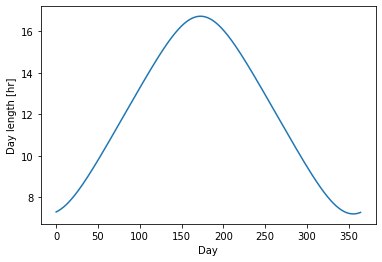

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline 

plt.plot(N, T)
plt.xlabel("Day")
plt.ylabel("Day length [hr]")
plt.savefig("daylength.pdf")

In [22]:
print("Minimum day length = {:5.2f} h".format(T.min()))
print("Maximum day length = {:5.2f} h".format(T.max()))

Minimum day length =  7.20 h
Maximum day length = 16.73 h


In [23]:
phi = math.radians(78+13/60) # latitude of Longyearbyen

In [24]:
# calculate day length in solar hours for all days of the year
h = np.arccos(-np.tan(delta)*math.tan(phi))
T = (np.degrees(2*h)/360)*u.sday.to(u.h)

/tmp/ipykernel_214/1004643983.py:2: RuntimeWarning: invalid value encountered in arccos
  h = np.arccos(-np.tan(delta)*math.tan(phi))


In [25]:
tmp = np.clip(-np.tan(delta)*math.tan(phi), -1.0, 1.0)
h = np.arccos(tmp)
T = (np.degrees(2*h)/360)*u.sday.to(u.h)

Text(0, 0.5, 'Day length [hr]')

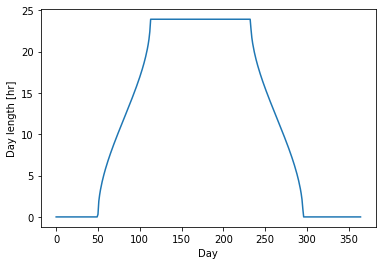

In [26]:
plt.plot(N, T)
plt.xlabel("Day")
plt.ylabel("Day length [hr]")

In [27]:
phi = { 'Hamburg'      : obs.lat.radian,
        'Longyearbyen' : math.radians(78 + 13/60) }

In [28]:
print(phi['Hamburg'])

0.9334069321033784


In [29]:
phi['New York'] = math.radians(40 + 43/60)
phi['Bangkok']  = math.radians(13 + 45/60)

In [30]:
print(len(phi))

4


Hamburg: 53.48 deg
Longyearbyen: 78.22 deg
New York: 40.72 deg
Bangkok: 13.75 deg


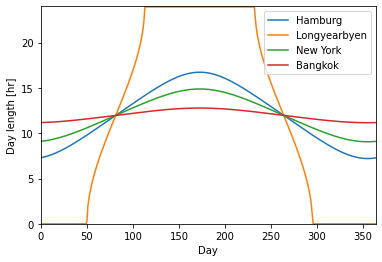

In [31]:
for key in phi:
    print(key + ": {:.2f} deg".format(math.degrees(phi[key])))
    
    h = np.arccos(np.clip(-np.tan(delta)*math.tan(phi[key]),
                          -1.0, 1.0))
    T = (np.degrees(2*h)/360) * u.sday.to(u.h)
    
    plt.plot(N, T, label=key)
   
plt.xlabel("Day")
plt.xlim(0,364)
plt.ylabel("Day length [hr]")
plt.ylim(0,24)
plt.legend(loc='upper right')
plt.savefig("daylength.pdf")

### Observing Betelgeuse

In [32]:
import astropy.units as u
from astropy.coordinates import SkyCoord, EarthLocation,\
    AltAz, get_sun

# geographical position of the observer
obs = EarthLocation(lat=53*u.deg+28*u.arcmin+49*u.arcsec, 
                    lon=10*u.deg+14*u.arcmin+23*u.arcsec)
             
# get latitude    
phi = obs.lat

In [33]:
from astropy.time import Time

utc_shift = 2*u.hour  # CEST time zone (+2h)

noon_cest = Time("2020-07-31 12:00:00") - utc_shift
print(noon_cest)

2020-07-31 10:00:00.000


In [34]:
import numpy as np

# time array covering next 24 hours in steps of 5 min
elapsed = np.arange(0, 24*60, 5)*u.min
time = noon_cest + elapsed

# sequence of horizontal frames
frame_local_24h = AltAz(obstime=time, location=obs)

In [35]:
type(np.arange(0, 24*60, 5))

numpy.ndarray

In [36]:
type(elapsed)

astropy.units.quantity.Quantity

In [37]:
# is instance of type
isinstance(elapsed, u.quantity.Quantity)

True

In [38]:
# is instance of base class
isinstance(elapsed, np.ndarray)

True

In [39]:
type(time)

astropy.time.core.Time

In [40]:
isinstance(time, np.ndarray)

False

In [41]:
import astropy.utils.misc

isinstance(time, astropy.utils.misc.ShapedLikeNDArray)

Traceback (most recent call last):
  File "/tmp/ipykernel_214/2191730828.py", line 3, in <module>
    isinstance(time, astropy.utils.misc.ShapedLikeNDArray)
AttributeError: module 'astropy.utils.misc' has no attribute 'ShapedLikeNDArray'

Use %tb to get the full traceback.


In [42]:
# star we want to observe
betelgeuse = SkyCoord.from_name('Betelgeuse')

betelgeuse_local = betelgeuse.transform_to(frame_local_24h)

In [43]:
sun = get_sun(time)

sun_local = sun.transform_to(frame_local_24h)

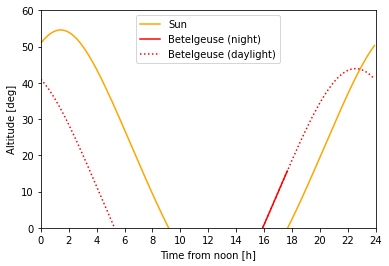

In [44]:
import matplotlib.pyplot as plt
%matplotlib inline 

elapsed_night = elapsed[np.where(sun_local.alt < 0)]
betelgeuse_night = betelgeuse_local.alt[np.where(sun_local.alt < 0)]

plt.plot(elapsed.to(u.h), sun_local.alt, 
         color='orange', label='Sun')
plt.plot(elapsed_night.to(u.h), betelgeuse_night, 
         color='red', label='Betelgeuse (night)')
plt.plot(elapsed.to(u.h), betelgeuse_local.alt, 
         color='red', linestyle=':', label='Betelgeuse (daylight)')

plt.xlabel('Time from noon [h]')
plt.xlim(0, 24)
plt.xticks(np.arange(13)*2)
plt.ylim(0, 60)
plt.ylabel('Altitude [deg]')
plt.legend(loc='upper center')
plt.savefig("Betelgeuse_obs_window.pdf")

See [docs.astropy.org/en/stable/generated/examples/coordinates/plot_obs-planning.html](https://docs.astropy.org/en/stable/generated/examples/coordinates/plot_obs-planning.html#) for a similar example. 

## Kepler's laws of planetary motion

In [45]:
import math
import numpy as np
from scipy.constants import year,hour,au,G
from astropy.constants import M_sun

M = M_sun.value # mass of the Sun in kg

# orbital parameters of planets 
# see https://nssdc.gsfc.nasa.gov/planetary/factsheet/
# mass in kg
m = 1e24*np.array([0.33011, 4.8675, 5.9723, 0.64171,\
                   1898.19, 568.34, 86.813, 102.413])
# semi-major axis in m
a = 1e9*np.array([57.9, 108.21, 149.60, 227.92,\
                  778.57, 1433.53, 2872.46, 4495.06])
              
# use Kepler's third law to calculate period in s
T_test_mass = 2*math.pi * (G*M)**(-1/2) * a**(3/2)
T_two_body = 2*math.pi * (G*(M + m))**(-1/2) * a**(3/2)

print("T [yr]  dev [hr] dev rel.")
for val1,val2 in zip(T_test_mass,T_two_body):
    dev = val1 - val2
    if dev > hour:
        line = "{0:6.2f}  {1:<7.1f}  {2:.1e}"
    else:
        line = "{0:6.2f}  {1:7.4f}  {2:.1e}"
    print(line.format(val2/year, dev/hour, dev/val1))

T [yr]  dev [hr] dev rel.
  0.24   0.0002  8.3e-08
  0.62   0.0066  1.2e-06
  1.00   0.0132  1.5e-06
  1.88   0.0027  1.6e-07
 11.88  49.6     4.8e-04
 29.68  37.2     1.4e-04
 84.20  16.1     2.2e-05
164.82  37.2     2.6e-05


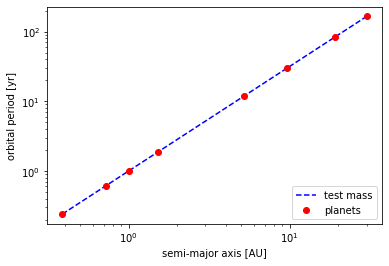

In [46]:
import matplotlib.pyplot as plt
%matplotlib inline 

plt.loglog(a/au, T_test_mass/year, 'blue', linestyle='--',\
           label='test mass')
plt.loglog(a/au, T_two_body/year, 'ro', label='planets')
plt.legend(loc='lower right')
plt.xlabel("semi-major axis [AU]")
plt.ylabel("orbital period [yr]")
plt.savefig("kepler_third_law.pdf")

## Gravitational and tidal forces

In [47]:
import numpy as np
from scipy.constants import g,G
from astropy.constants import R_earth,M_earth

M = 0.07346e24 # mass of the moon in kg
r = 3.844e8 # semi-major axis of moon orbit in m

coeff = G*M/r**3
accel_scale = 2*coeff*R_earth.value
print("tidal acceleration = {:.2e} m/s^2 = {:.2e} g".\
      format(accel_scale,accel_scale/g))

h = 15*M*R_earth.value**4/(8*M_earth.value*r**3)
print("size of tidal bulge = {:.2f} m".format(h))

# array of evenly spaced grid points along x- and y-axis
X = np.linspace(-1.1, 1.1, num=23, endpoint=True)
Y = np.linspace(-1.1, 1.1, num=23, endpoint=True)
print(X)

# create two-dimensional mesh grid scaled by Earth radius
R_x, R_y = np.meshgrid(R_earth.value*X, R_earth.value*Y)
print(R_x.shape)
print(R_x[11,21],R_y[11,21])

# radial distances of mesh points from (0,0)
R = np.sqrt(R_x*R_x + R_y*R_y)

# components of tidal acceleration field within Earth radius
accel_x = np.ma.masked_where(R > R_earth.value, 2*coeff*R_x)
accel_y = np.ma.masked_where(R > R_earth.value, -coeff*R_y)

tidal acceleration = 1.10e-06 m/s^2 = 1.12e-07 g
size of tidal bulge = 0.67 m
[-1.1 -1.  -0.9 -0.8 -0.7 -0.6 -0.5 -0.4 -0.3 -0.2 -0.1  0.   0.1  0.2
  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1.   1.1]
(23, 23)
6378100.0 0.0


In [48]:
accel_x.size

529

```R_x[11,21]``` and ```R_y[11,21]``` are given by the following to elements of ```X``` and ```Y```

In [49]:
X[21]*R_earth.value

6378100.0

In [50]:
Y[11]*R_earth.value

0.0

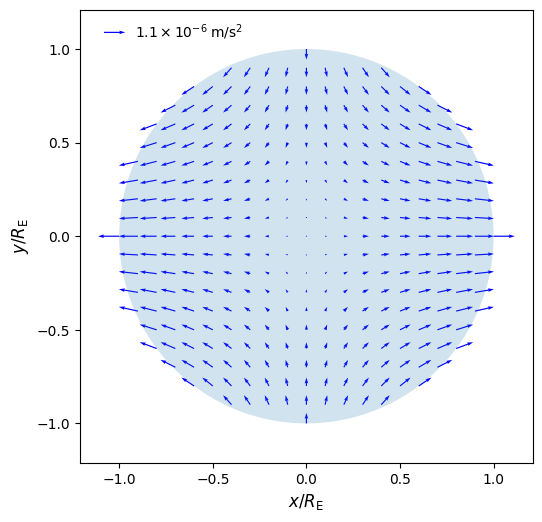

In [51]:
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
%matplotlib inline 

fig, ax = plt.subplots(figsize=(6,6),dpi=100)
ax.set_aspect('equal')

# plot vector field
arrows = ax.quiver(X, Y, accel_x, accel_y, color='blue')
ax.quiverkey(arrows, X=0.1, Y=0.95, U=accel_scale,
             label=r'$1.1\times 10^{-6}\;\mathrm{m/s}^2$', 
             labelpos='E')

# add a circle
circle = Circle((0, 0), 1, alpha=0.2, edgecolor=None)
ax.add_patch(circle)

ax.set_xlabel(r'$x/R_{\mathrm{E}}$', fontsize=12)
ax.set_ylabel(r'$y/R_{\mathrm{E}}$', fontsize=12)

plt.savefig("tidal_accel_earth.pdf")